# Biodiversity in National Parks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

observations = pd.read_csv('observations_df.csv')
species = pd.read_csv('species_df.csv')

## 'Observations' Dataset

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
# Examine column names and data types

observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [7]:
# Get unique values (and their counts) for 'park_name' column

observations['park_name'].value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

There are only *four* national parks represented in this dataset: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and Yellowstone National Park.

## 'Species' Dataframe

In [8]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [9]:
# Examine column names and data types

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


It appears that both datasets share a column: **'scientific_name'**.

In [10]:
# Merge both datasets on shared 'scientific_name' column

master = species.merge(observations, on = 'scientific_name')
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


It looks like **'conservation_status'** has far fewer entires than the other columns.

In [11]:
master.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [12]:
master['conservation_status'].value_counts()

Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: conservation_status, dtype: int64

In [13]:
master['conservation_status'].isna().value_counts()

True     24752
False      880
Name: conservation_status, dtype: int64

Whoa. There are many entries that have 'NaN' in the **'conservation_status'** column. Let's replace them with more useful information.

In [14]:
master['conservation_status'].fillna('No Concern', inplace = True)
master['conservation_status'].value_counts()

No Concern            24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64

In [17]:
# Bar plot to visualize frequency of different conservation statuses

status = list(master['conservation_status'].unique())
frequency = []

for s in status:
    frequency.append(len(master[master['conservation_status'] == s]))
    
print(status)
print(frequency)

['No Concern', 'Species of Concern', 'Endangered', 'In Recovery', 'Threatened']
[24752, 732, 80, 24, 44]


<Figure size 640x480 with 0 Axes>

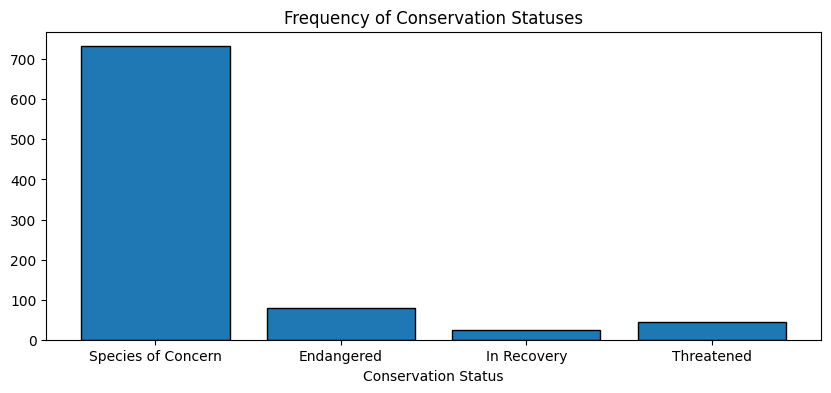

In [16]:
# Plot without 'No Concern'
plt.clf()
plt.figure(figsize = (10, 4))
plt.bar(status[1:], frequency[1:], edgecolor = 'black')
plt.title('Frequency of Conservation Statuses')
plt.xlabel('Conservation Status')
plt.show()

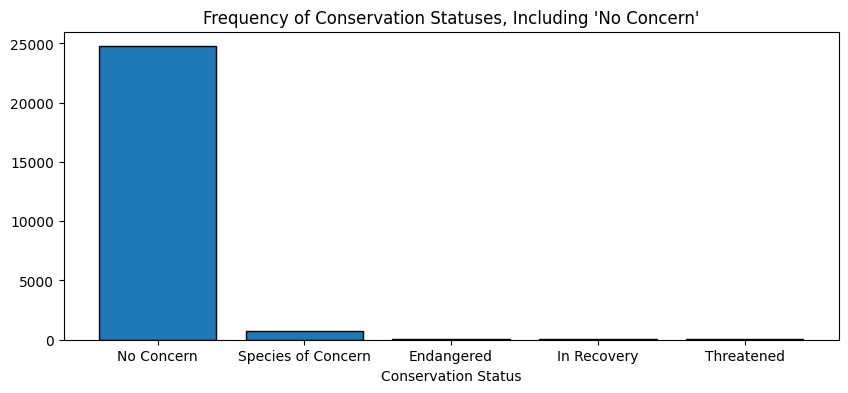

In [18]:
# Plot with 'No Concern'
plt.figure(figsize = (10, 4))
plt.bar(status, frequency, edgecolor = 'black')
plt.title('Frequency of Conservation Statuses, Including \'No Concern\'')
plt.xlabel('Conservation Status')
plt.show()

In [21]:
# Calculate total number of endangered species

no_concern = master['conservation_status'] != 'No Concern'
endangered = master[no_concern]

endangered_total = endangered['category'].value_counts().sum()

print('Total endangered species: ' + str(endangered_total))
print()
print(endangered['category'].value_counts())

Total endangered species: 880

Bird                 348
Mammal               232
Vascular Plant       184
Fish                  48
Amphibian             28
Reptile               20
Nonvascular Plant     20
Name: category, dtype: int64


In [22]:
# Calculate proportion of each species in total population

endangered_pop = []
population_prop = []

species_names = list(master['category'].unique())

for i in species_names:
    endangered_pop.append(len(endangered[endangered['category'] == i]))
    population_prop.append(len(endangered[endangered['category'] == i]) / endangered_total)

species_prop = list(zip(species_names, population_prop))

for p in species_prop:
    print('{animal}: {proportion}%'.format(animal = p[0], proportion = round(p[1], 2) * 100))

Mammal: 26.0%
Bird: 40.0%
Reptile: 2.0%
Amphibian: 3.0%
Fish: 5.0%
Vascular Plant: 21.0%
Nonvascular Plant: 2.0%


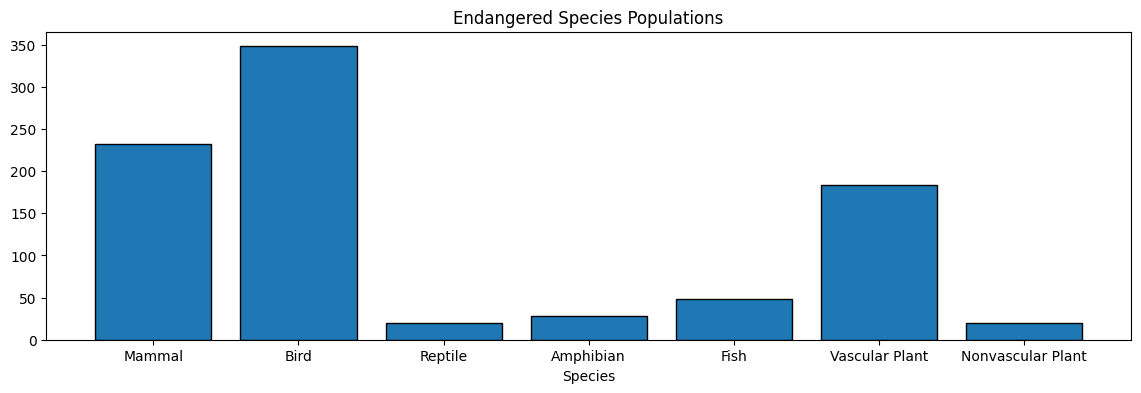

In [23]:
# Bar plot of endangered species populations

plt.figure(figsize = (14, 4))
plt.bar(species_names, endangered_pop, edgecolor = 'black')
plt.title('Endangered Species Populations')
plt.xlabel('Species')
plt.show()

In [24]:
# Make pie chart more readable (after first inspection)

pie_labels = ['Mammal', 'Bird', 'Vascular Plant', 'Other']
pie_nums = [0.264, 0.395, 0.209]
other_prop = 0.0
for i in population_prop:
    if i < 0.1:
        other_prop += i
        
pie_nums.append(other_prop)

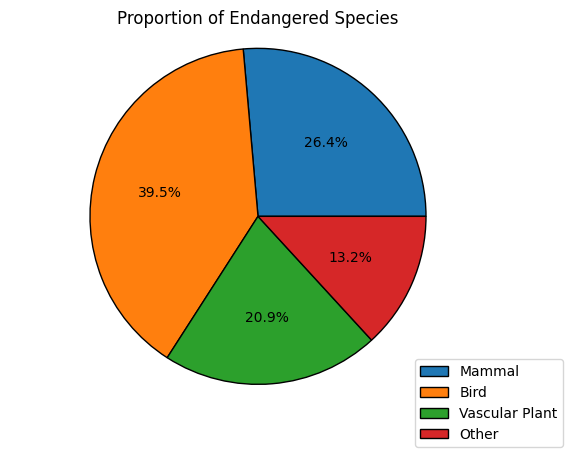

In [18]:
# Pie chart of endangered species proportions

plt.pie(pie_nums, autopct='%0.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
plt.title('Proportion of Endangered Species')
plt.legend(pie_labels, bbox_to_anchor = (1,0), loc = 'lower right', bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()

# Analysis of Individual Parks

In [26]:
# Separate national parks into separate dataframes

yosemite = master[master['park_name'] == 'Yosemite National Park']
smoky = master[master['park_name'] == 'Great Smoky Mountains National Park']
bryce = master[master['park_name'] == 'Bryce National Park']
yellowstone = master[master['park_name'] == 'Yellowstone National Park']

## Most Spotted Species

In [27]:
# Name most-spotted species in each national park, along with their observation counts

parks_lst = [yosemite, smoky, bryce, yellowstone]
    
def most_spotted(parkdf_lst):
    
    return_lst = []
    
    for p in parkdf_lst:
        park = p.iloc[0, 4]
        print(park + ':')
        spotted_freq = p.sort_values(by = 'observations', ascending = False)
        most_spotted = spotted_freq.iloc[0, 2]
        times_spotted = spotted_freq.iloc[0, -1]
        print(most_spotted + ': ' + str(times_spotted))
        print()
        
        return_lst.append([park, most_spotted, times_spotted])
        
    return return_lst

most_spotted(parks_lst)

Yosemite National Park:
Shockley's Ivesia, Sky Mousetail: 223

Great Smoky Mountains National Park:
Spiny Sowthistle: 147

Bryce National Park:
Beaked Corn-Salad, Corn Salad: 176

Yellowstone National Park:
Deep-Root Clubmoss, Ground Cedar: 321



[['Yosemite National Park', "Shockley's Ivesia, Sky Mousetail", 223],
 ['Great Smoky Mountains National Park', 'Spiny Sowthistle', 147],
 ['Bryce National Park', 'Beaked Corn-Salad, Corn Salad', 176],
 ['Yellowstone National Park', 'Deep-Root Clubmoss, Ground Cedar', 321]]

# Visualizations and Associations

In [28]:
master.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Concern,Yosemite National Park,128


<Figure size 640x480 with 0 Axes>

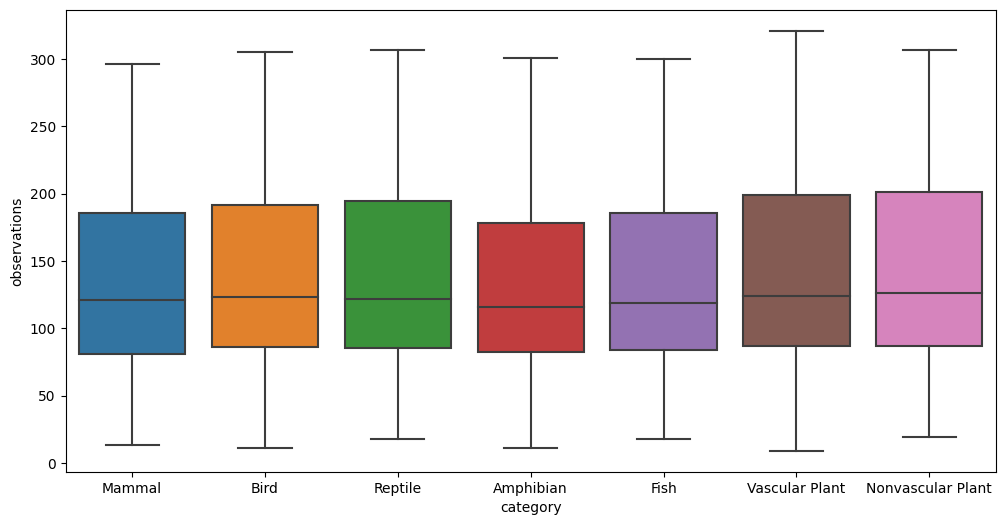

In [39]:
plt.clf()
plt.figure(figsize = (12, 6))
sns.boxplot(x = master.category, y = master.observations)
plt.show()

<Figure size 640x480 with 0 Axes>

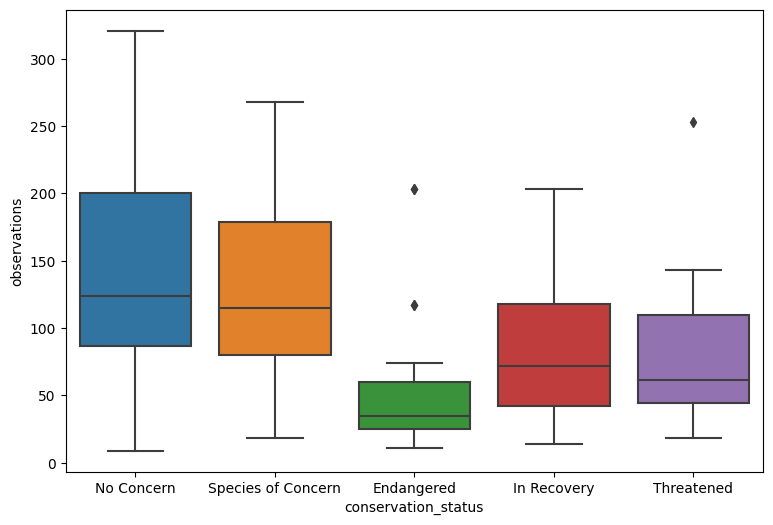

In [35]:
plt.clf()
plt.figure(figsize = (9, 6))
sns.boxplot(x = master.conservation_status, y = master.observations)
plt.show()

It seems pretty obvious that there is a correlation between conservation status and number of observations. But to back up this hypothesis, let's perform ANOVA and Tukey Range Tests.

In [40]:
obs_no_concern = master.observations[master.conservation_status == 'No Concern']
obs_concern = master.observations[master.conservation_status == 'Species of Concern']
obs_endangered = master.observations[master.conservation_status == 'Endangered']
obs_recovering = master.observations[master.conservation_status == 'In Recovery']
obs_threatened = master.observations[master.conservation_status == 'Threatened']

In [41]:
# ANOVA
from scipy.stats import f_oneway

fstat, pval = f_oneway(
    obs_no_concern,
    obs_concern,
    obs_endangered,
    obs_recovering,
    obs_threatened
)
print('ANOVA P-value:', pval)

ANOVA P-value: 4.1211891612861455e-52


Given this p-value, we can conclude that there is a staggeringly significant correlation between conservation status and number of observations.

In [42]:
# Tukey Range Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(master.observations, master.conservation_status, 0.05)
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
        Endangered        In Recovery  43.8792 0.0526   -0.299  88.0573  False
        Endangered         No Concern  99.2002    0.0  77.9435  120.457   True
        Endangered Species of Concern  84.4509    0.0  62.0988  106.803   True
        Endangered         Threatened  31.9739 0.1028  -3.6533   67.601  False
       In Recovery         No Concern  55.3211 0.0009  16.5555  94.0866   True
       In Recovery Species of Concern  40.5717 0.0397   1.1949  79.9486   True
       In Recovery         Threatened -11.9053  0.962 -60.0739  36.2633  False
        No Concern Species of Concern -14.7493    0.0 -21.8683  -7.6304   True
        No Concern         Threatened -67.2264    0.0 -95.8682 -38.5845   True
Species of Concern         Threatened  -52.477    0.

I would like to investigate these results further considering some of the null hypothesis rejections the Tukey Range Test outputted. For instance, there was significant overlap between the 'No Concern' and 'Species of Concern' columns, suggesting little to no correlation in terms of observations, but the significance test suggests otherwise. Perhaps I'm not correctly using this tool or have gone about answering this question the wrong way.